# **Project Part 2**
**Group #3**

*Audrey Kuo, Alec Brown, Bella Rogers, Jendayia Taylor, Miller Devane, Ramnath Gandhi, Matthew Congiusta*

- IF Models (Integrate and Fire)
    - Type of mathematical model that represents how neurons respond to stimuli
    - Simplifies neuronal dynamics and spiking behavior
    - Inputs are integrated and the neuron spikes if a threshold is reached
    - Involves linear increase of membrane potential based on injected current until threshold is reached
    - Output is represented in binary: 0 corresponds to no action potential and 1 corresponds to an action potential
    - Does not incorporate leaky ion channels

[GitHub Repository Link](https://github.com/kuo-audrey/NEUR-3002)


# Integrate-and-Fire Model

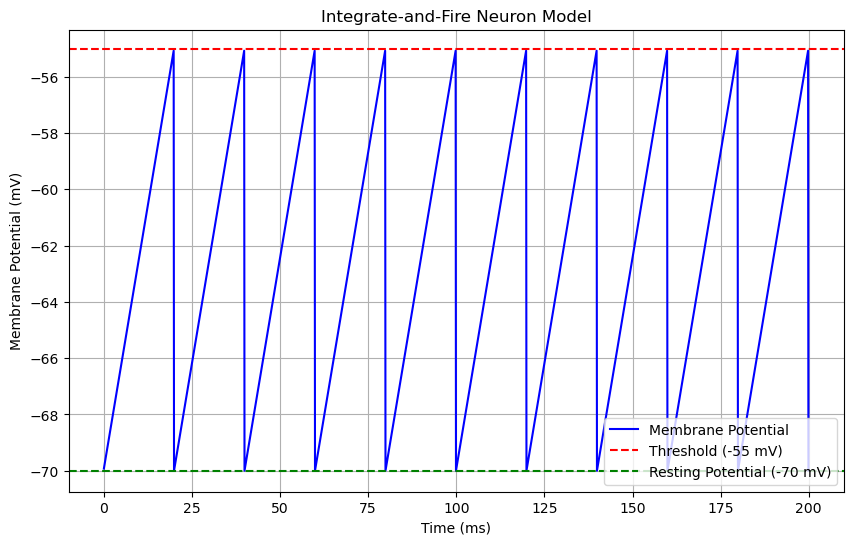

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 200  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = resting_potential  # reset potential set to resting potential
linear_increase_rate = 0.5  # increased linear increase rate (mV/ms per µA of current)

# Input current (constant for simplicity)
input_current = 1.5  # input current (µA)

# Initialize variables
membrane_potential = resting_potential
potential_trace = []

for t in time:
    # Update membrane potential linearly based on input current
    membrane_potential += linear_increase_rate * input_current * dt

    # Check for spike
    if membrane_potential >= threshold_potential:
        membrane_potential = reset_potential  # Reset to resting potential

    # Record potential
    potential_trace.append(membrane_potential)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, potential_trace, label="Membrane Potential", color="blue")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")

plt.title("Integrate-and-Fire Neuron Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
plt.show()

Based on the above visualization and prior knowledge of leaky integrate and fire models, the above integrate and fire model is very much an oversimplified representation of a biological neuron's dynamic behavior. This model is binary because it represents the neuron as simply firing or not firing, failing to account for more nuanced elements of a biological neuron such as the various inhibitory and excitatory graded potentials that could possibly affect its firing behavior. One aspect of this model that is most unlike a real biological neuron is the linear increase in membrane potential in response to injected current. This means that it does not have the distinct nonlinear phases of depolarization, overshoot, and repolarization that are commonly found in biological neurons. Another essential missing aspect from the above integrate-and-fire neuron model is the presence of leaky ion channels that cause the leakage of current across the membrane, which is what leads to the nonlinear increase in membrane potential in real biological neurons. The model also does not incorporate the phase of hyperpolarization immediately after a spike, effectively creating a refractory period during which the neuron cannot fire another actional potential. A real biological neuron consists of several components, including dendrites, soma, and axons that are not accounted for in the integrate and fire model. Real biological neurons are also much more dynamic in the sense that they exhibit adaptation, adjusting firing rate when met with sustained input. The aspects that are like biological neurons are the integration of input that causes an increase in membrane potential, the firing of an action potential once threshold is reached, and the return to resting potential.

The most challenging aspect of this homework was correcting the code in order to ensure that the increase in membrane potential did in fact increase linearly to accurately represent a neuronal IF model. Another difficult aspect of the assignment was analyzing the associated visualization to pinpoint strengths and limitations of the IF model in representing a biological neuron.

I would estimate that this project took around 20 minutes to complete.

# **Project Part 3**

- LIF Models (Leaky Integrate and Fire)
    - Inputs are integrated linearly but with a leak term
    - An action potential occurs if a threshold is reached
    - Involves increase of membrane potential based on injected current until threshold is reached
    - Output is represented in binary: 0 corresponds to no action potential and 1 corresponds to an action potential
    - Includes leaky ion channels, allowing the membrane potential to decay over time, without any additional input
    - More natural decay of membrane potential over time rather than  harsh reset to resting potential seen in I&F model
    - Explains the importance of the leakage of ions across the cell membrane, making it more biologically accurate
than the I&F Model

- Hodgkin-Huxley Model
    - Type of mathematical model that represents the electrical properties of neurons 
    - Describes what happens to the membrane potential and ionic currents during an action potential
    - Includes voltage-gated ion channels for sodium (Na+) and potassium (K+), as well as a leaky channels
    - It models the cell membrane as an circuit with capacitance and multiple conductances
    - Includes four coupled differential equations that determines the changes in membrane potential and the variables representing ion channels
    - Gives a detailed and accurate representation of neuronal spiking

# Original Integrate-and-Fire Model

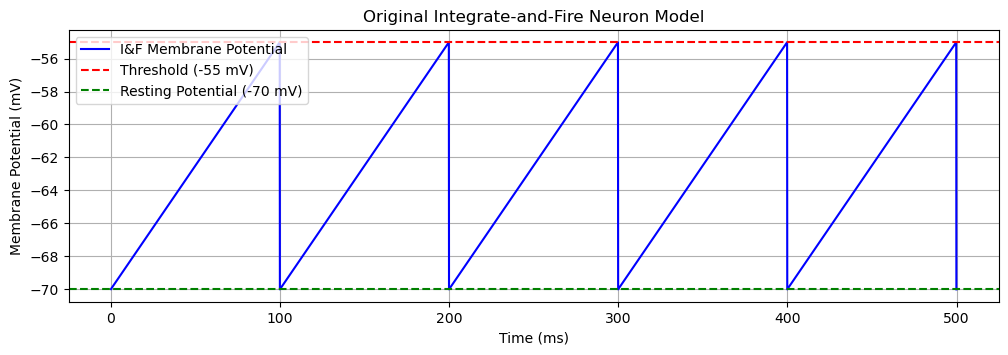

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 500  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = -75  # reset potential (mV)
linear_increase_rate = 0.1  # linear increase rate (mV/ms per µA of current)

# Initialize variables for I&F model
membrane_potential_IF = resting_potential
potential_trace_IF = []

# Simulation loop
for t in time:
    # --- I&F Model --- #
    membrane_potential_IF += linear_increase_rate * input_current_IF * dt

    # Check for spike in I&F model
    if membrane_potential_IF >= threshold_potential:
        membrane_potential_IF = reset_potential

    # Ensure the potential does not go below the resting potential
    if membrane_potential_IF < resting_potential:
        membrane_potential_IF = resting_potential

    potential_trace_IF.append(membrane_potential_IF)

# Plot results
plt.figure(figsize=(12, 12))

# Plot for I&F Model
plt.subplot(3, 1, 1)
plt.plot(time, potential_trace_IF, label="I&F Membrane Potential", color="blue")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("Original Integrate-and-Fire Neuron Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()

# Updated Leaky Integrate-and-Fire Model

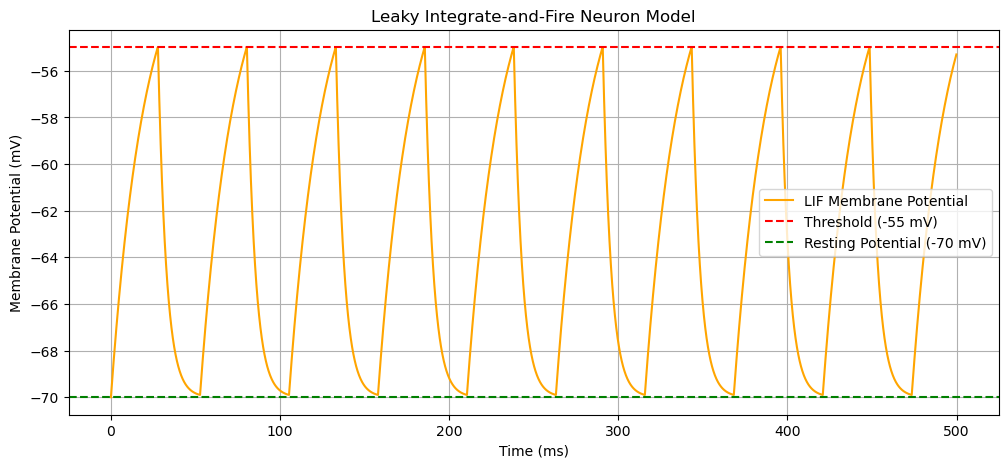

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 500  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = -70  # reset potential (mV)
decay_time = 5  # time constant for decay after spike (ms)

# LIF Model Parameters
tau = 20  # membrane time constant (ms)
resistance = 10  # membrane resistance (MΩ)

# Input current (constant input)
input_current_LIF = 2.0  # µA
low_input_current_LIF = 1.4

# Initialize membrane potential
membrane_potential_LIF = resting_potential
potential_trace_LIF = []
decaying = True  # Flag to indicate if in decay phase
spike_start_time = 0  # When the spike occurred

# Simulation loop
for t in time:
    # --- LIF Model --- #
    if decaying:
        # Gradual decay towards reset potential (exponential decay formula)
        membrane_potential_LIF += (reset_potential - membrane_potential_LIF) * (dt / decay_time)

        # Stop decay when close enough to reset potential
        if membrane_potential_LIF <= reset_potential + 0.1:
            decaying = False  # End decay

    elif membrane_potential_LIF >= threshold_potential:
        # Spike occurs
        decaying = True  # Begin decay
        spike_start_time = t  # Mark when spike happened

    else:
        # Leaky integration: Exponential decay + input current
        membrane_potential_LIF += (resting_potential - membrane_potential_LIF + input_current_LIF * resistance) * dt / tau

    potential_trace_LIF.append(membrane_potential_LIF)


# Plot for LIF Model
plt.figure(figsize=(12, 5))
plt.plot(time, potential_trace_LIF, label="LIF Membrane Potential", color="orange")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("Leaky Integrate-and-Fire Neuron Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
plt.show()

# Leaky Integrate-and-Fire Model with Differing Inputs

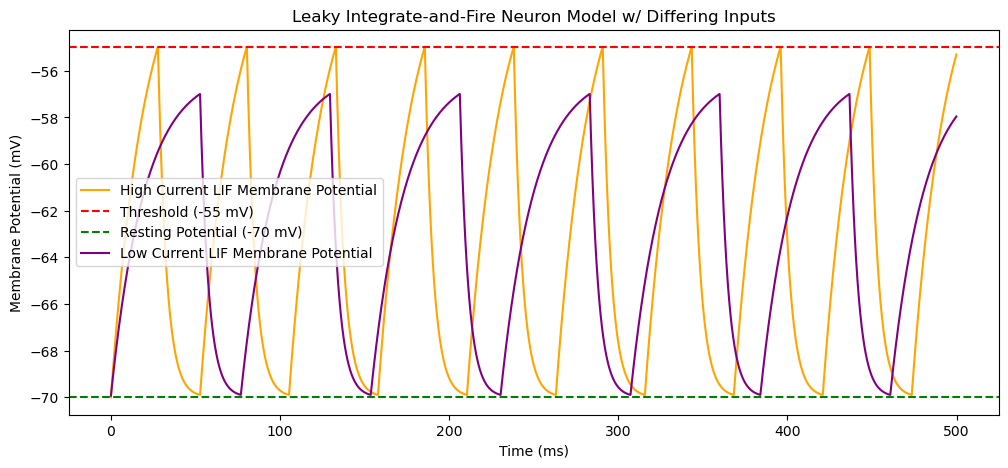

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
total_time = 500  # total simulation time (ms)
time = np.arange(0, total_time, dt)

# Neuron parameters
resting_potential = -70  # resting potential (mV)
threshold_potential = -55  # threshold potential (mV)
reset_potential = -70  # reset potential (mV)
decay_time = 5  # time constant for decay after spike (ms)

# LIF Model Parameters
tau = 20  # membrane time constant (ms)
resistance = 10  # membrane resistance (MΩ)

# Input current (constant input)
input_current_LIF = 2.0  # µA
low_input_current_LIF = 1.4

# Initialize membrane potential
membrane_potential_LIF = resting_potential
low_potential_trace_LIF = []
decaying = False  # Flag to indicate if in decay phase
spike_start_time = 0  # When the spike occurred

# Simulation loop
for t in time:
    # --- Decreased Current LIF Model --- #
    if decaying:
        # Gradual decay towards reset potential (exponential decay formula)
        membrane_potential_LIF += (reset_potential - membrane_potential_LIF) * (dt / decay_time)

        # Stop decay when close enough to reset potential
        if membrane_potential_LIF <= reset_potential + 0.1:
            decaying = False  # End decay

    elif membrane_potential_LIF >= threshold_potential - 2:
        # Spike occurs
        decaying = True  # Begin decay
        spike_start_time = t  # Mark when spike happened

    else:
        # Leaky integration: Exponential decay + input current
        membrane_potential_LIF += (resting_potential - membrane_potential_LIF + low_input_current_LIF * resistance) * dt / tau

    low_potential_trace_LIF.append(membrane_potential_LIF)


# Plot for LIF Model
plt.figure(figsize=(12, 5))
plt.plot(time, potential_trace_LIF, label="High Current LIF Membrane Potential", color="orange")
plt.axhline(y=threshold_potential, color='red', linestyle='--', label="Threshold (-55 mV)")
plt.axhline(y=resting_potential, color='green', linestyle='--', label="Resting Potential (-70 mV)")
plt.title("Leaky Integrate-and-Fire Neuron Model w/ Differing Inputs")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid()
# Plot Low Current LIF Results
plt.plot(time, low_potential_trace_LIF, label="Low Current LIF Membrane Potential", color="purple")
plt.legend()
plt.grid()
plt.show()

In the original leaky integrate-and-fire neuron model, the inject current was kept at a constant high rate of 2.0 Amperes, which meant that there was consistently enough input for the membrane potential to be depolarized and reach threshold, resulting in an action potential. The change that was made to the inputs, codewise, was that the variable "input_current_LIF = 2.0" was changed to "low_input_current_LIF = 1.4". In the model, this effectively decreased the injected current from 2.0 A to 1.4 A, resulting in there not being enough inputs summed for the membrane potential to ever reach threshold or fire an action potential. Another aspect of the code that was changed along with the value of the injected current was changing "elif membrane_potential_LIF >= threshold_potential" to "elif membrane_potential_LIF >= threshold_potential - 2". This ensures that the membrane potential never quite reaches threshold since the leaky channels cause it to decay before then.

- The standard IF model assumes there is linear increase of membrane potential with an input current. Real neurons though, have passive leaky conductance as a result of leaky ion channels, which causes input current to continuously leak out through the membrane of the neuron. The leaky integrate-and-fire model reflects this aspect of biological neurons. This means that the most important change we had to make to update the model was to ensure that the increase of membrane potential to reach the threshold is nonlinear. In addition, after the threshold is reached and an action potential is fired, we needed to make sure that the decrease in membrane potential towards resting potential was nonlinear, instead of immediate like in the original I&F model. This reflects the more natural and gradual decay in membrane potential over a few miliseconds after an action potential as a result of the leaky ion channels being incorporated into this model. We also corrected a previous inaccuracy to fix our model, which was removing the hyperpolarization aspect, which is not included in these simplified models.
- In regard to the code, these changes were implemented by adding an exponential function for decay towards resting potential after an action potential is reached.
  "if decaying:
        # Gradual decay towards reset potential (exponential decay formula)
        membrane_potential_LIF += (reset_potential - membrane_potential_LIF) * (dt / decay_time)

        # Stop decay when close enough to reset potential
        if membrane_potential_LIF <= reset_potential + 0.1:
            decaying = False  # End decay"
  We also incorporated the idea of leaky integration, meaning that the inputs are summed linearly, but there is a leak term involved that causes the ultimate increase in membrane potential to be nonlinear. This was done by adding the following code:
  "    else:
        # Leaky integration: Exponential decay + input current
        membrane_potential_LIF += (resting_potential - membrane_potential_LIF + input_current_LIF * resistance) * dt / tau"
  
- Information theory within applied mathematics studies how information can be quantified, stored, and communicated, with signals typically disregarding context/meaning. A bit (“binary digit”) is a unit of measuring the amount of information (e.g. binary answers) needed to determine an answer to a single question: 1 bit represents the amount of information needed to distinguish between two equally likely outcomes. Shannon’s entropy allows for comparison of amounts of information and is the amount of uncertainty or randomness involved in the value of a variable or process. It is a useful equation to establish coding efficiency: more entropy means more uncertainty and more bits required to distinguish an answer. The HH model contains the most bits because it is the most complex model and the least predictable. It uses nonlinear equations and encodes membrane and ion channels, including leaky ion channels. The HH model also has the highest Shannon’s entropy because it is the most biologically accurate (models ion channels explicitly), takes in the most parameters, and involves continuous equations and more variability. The LIF model has lower entropy and fewer bits than the HH model, but higher entropy and more bits than the I&F model.

- We were able to visualize code between our group using the ReadMe submission option in GitHub and successively submitted via GitHub, but sometimes it was difficult to upload parts of code or the project. We shared work over text and documents collaboratively and were able to transfer over to GitHub by integrating it into a Jupyter Notebook beforehand to ensure that everything runs smoothly. It is new to many of us but interesting and helpful software.